In [29]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits, ascii

%matplotlib inline
plt.rcParams["figure.figsize"] = (16, 8)

In [65]:
#import all the data (Fluxes are in mJy)

hd6256_bcd  = ascii.read('../hd_aor_test/r65216256_bcd.csv')
hd6256_cbcd = ascii.read('../hd_aor_test/r65216256_cbcd.csv')
hd3040_bcd  = ascii.read('../hd_aor_test/r65463040_bcd.csv')
hd3040_cbcd = ascii.read('../hd_aor_test/r65463040_cbcd.csv')

bd7280_bcd  = ascii.read('../bd_aor_test/r65217280_bcd.csv')
bd7280_cbcd = ascii.read('../bd_aor_test/r65217280_cbcd.csv')
bd4064_bcd  = ascii.read('../bd_aor_test/r65464064_bcd.csv')
bd4064_cbcd = ascii.read('../bd_aor_test/r65464064_cbcd.csv')

data = [hd6256_bcd, hd6256_cbcd, hd3040_bcd, hd3040_cbcd, bd7280_bcd, bd7280_cbcd, bd4064_bcd,bd4064_cbcd]
aor  = ['hd65216256', 'hd65463040', 'bd65217280', 'bd65464064']

In [17]:
# comparing raw to refined

for i, d in enumerate(data):
    raw_mean = np.mean(d['Raw_Flux'])
    raw_stdv = np.std(d['Raw_Flux'])
    ref_mean = np.mean(d['Refined_Flux'])
    ref_stdv = np.std(d['Refined_Flux'])
    print '%i. raw: %f +- %f, ref: %f +- %f' % (i+1, raw_mean, raw_stdv, ref_mean, ref_stdv)

1. raw: 657.745207 +- 12.397002, ref: 653.408615 +- 8.339263
2. raw: 658.035844 +- 12.189431, ref: 653.203646 +- 8.250973
3. raw: 651.309833 +- 13.230661, ref: 648.979743 +- 7.864876
4. raw: 651.583180 +- 13.272609, ref: 648.664933 +- 8.025610
5. raw: 40.200815 +- 1.210598, ref: 39.111280 +- 0.846740
6. raw: 40.257131 +- 1.260350, ref: 39.130800 +- 0.857621
7. raw: 40.669820 +- 1.160135, ref: 39.008033 +- 0.578113
8. raw: 40.715758 +- 1.131916, ref: 39.003183 +- 0.555844


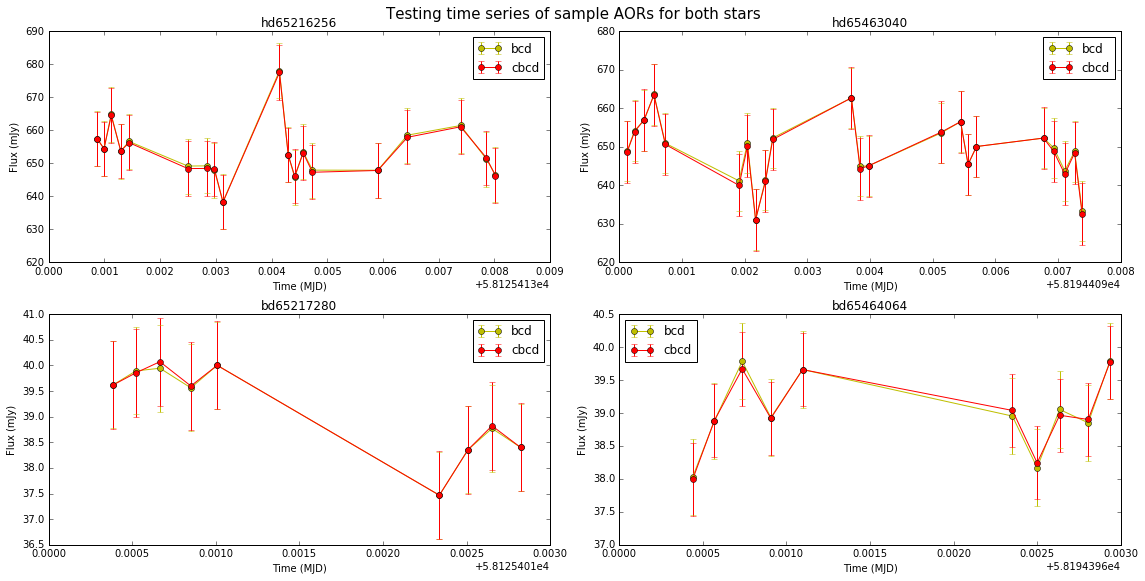

In [75]:
#plotting

fig, ax = plt.subplots(2,2)
ax = ax.reshape((4))

for c, i in enumerate(range(8)[::2]):
    
    ax[c].errorbar(data[i]['Time[MJD]'], data[i]['Refined_Flux'], np.std(data[i]['Refined_Flux']), fmt = 'yo-', label = 'bcd')
    ax[c].errorbar(data[i+1]['Time[MJD]'], data[i+1]['Refined_Flux'], np.std(data[i+1]['Refined_Flux']), fmt = 'ro-', label = 'cbcd')
    ax[c].set_xlabel('Time (MJD)')
    ax[c].set_ylabel('Flux (mJy)')
    ax[c].set_title(aor[c])
    ax[c].legend(loc='best')

fig.suptitle('Testing time series of sample AORs for both stars', x = 0.5, y = 1, fontsize = 15)
fig.tight_layout()
fig.savefig('General_Plots/AORtest.png')